# Task 1

In [42]:
#Titanic Dataset read csv file from url

In [43]:
import pandas as pd
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
print(titanic.info)
print(titanic.columns)

<bound method DataFrame.info of       pclass  survived                                               name  \
0        1.0       1.0                      Allen, Miss. Elisabeth Walton   
1        1.0       1.0                     Allison, Master. Hudson Trevor   
2        1.0       0.0                       Allison, Miss. Helen Loraine   
3        1.0       0.0               Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1.0       1.0                                Anderson, Mr. Harry   
6        1.0       1.0                  Andrews, Miss. Kornelia Theodosia   
7        1.0       0.0                             Andrews, Mr. Thomas Jr   
8        1.0       1.0      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1.0       0.0                            Artagaveytia, Mr. Ramon   
10       1.0       0.0                             Astor, Col. John Jacob   
11       1.0       1.0  Astor, Mrs. John Jac

In [44]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

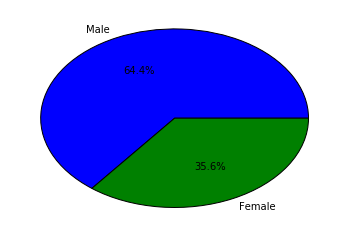

In [52]:
#1. create pie chart presenting male ande female proportion
sizes=[(titanic.sex.value_counts().male)*100/len(titanic.index) , (titanic.sex.value_counts().female)*100/len(titanic.index)]
labels = 'Male','Female'
fig1, ax1 = plt.subplots()
explode=(0,0)
ax1.pie(sizes, labels=labels,explode=explode, autopct="%1.1f%%")
plt.show()

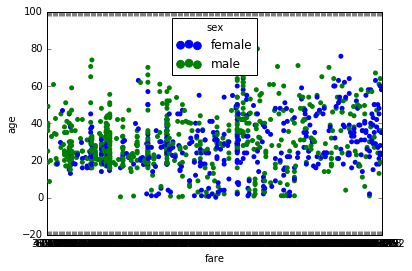

In [56]:
#2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
import seaborn as sns
sns.stripplot(x=titanic.fare,y=titanic.age,hue=titanic.sex)

# Task 2

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [9]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [10]:
#1.Some values in the the FlightNumber column are missing. These numbers are meant to
#  increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
#   numbers and make the column an integer column (instead of a float column).
df.FlightNumber = df["FlightNumber"].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [149]:
#2.The From_To column would be better as two separate columns! Split each string on the
#underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
#correct column names to this temporary DataFrame.
tmp = {"from": df.From_To.apply(lambda x: x.split("_")[0]), "to":df.From_To.apply(lambda x: x.split("_")[1])} 
tmp_df = pd.DataFrame(data=tmp)
tmp_final_df = pd.concat([tmp_df,df.drop(['From_To'],axis=1)],axis=1)
print(tmp_final_df)

       from         to  FlightNumber  RecentDelays              Airline
0    LoNDon      paris         10055      [23, 47]               KLM(!)
1    MAdrid      miLAN            10            []    <Air France> (12)
2    londON  StockhOlm         10075  [24, 43, 87]  (British Airways. )
3  Budapest      PaRis            10          [13]       12. Air France
4  Brussels     londOn         10095      [67, 32]          "Swiss Air"


In [150]:
#3.Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
#Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
#"London".)
tmp_final_df[["from","to"]] = tmp_final_df[["from","to"]].apply(lambda x: x.str.capitalize())
tmp_final_df

,from,to,FlightNumber,RecentDelays,Airline
0,London,Paris,10055,"[23, 47]",KLM(!)
1,Madrid,Milan,10,[],<Air France> (12)
2,London,Stockholm,10075,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10,[13],12. Air France
4,Brussels,London,10095,"[67, 32]","""Swiss Air"""


In [151]:
#4.Delete the From_To column from df and attach the temporary DataFrame from the previous questions.
df =  pd.concat([tmp_final_df[["from","to"]],df.drop(['From_To'],axis=1)],axis=1)
print(df)

       from         to  FlightNumber  RecentDelays              Airline
0    London      Paris         10055      [23, 47]               KLM(!)
1    Madrid      Milan            10            []    <Air France> (12)
2    London  Stockholm         10075  [24, 43, 87]  (British Airways. )
3  Budapest      Paris            10          [13]       12. Air France
4  Brussels     London         10095      [67, 32]          "Swiss Air"


In [162]:
#5.In the RecentDelays column, the values have been entered into the DataFrame as a list. We
#would like each first value in its own column, each second value in its own column, and so on. If
#there isn't an Nth value, the value should be NaN.

#Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
#delay_2, etc. and replace the unwanted RecentDelays column in df with delays.
delays = df.RecentDelays
print((pd.DataFrame(df.RecentDelays.values.tolist(),columns=["delay_1","delay_2","delay_3"])).join(df.drop(["RecentDelays"],axis=1)))

   delay_1  delay_2  delay_3      from         to  FlightNumber  \
0     23.0     47.0      NaN    London      Paris         10055   
1      NaN      NaN      NaN    Madrid      Milan            10   
2     24.0     43.0     87.0    London  Stockholm         10075   
3     13.0      NaN      NaN  Budapest      Paris            10   
4     67.0     32.0      NaN  Brussels     London         10095   

               Airline  
0               KLM(!)  
1    <Air France> (12)  
2  (British Airways. )  
3       12. Air France  
4          "Swiss Air"  
